[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/melixxa07/AI-Project/blob/main/01%20-%20Data%20Exploration.ipynb)

# <font color ="royalblue"> <font face = 'Century'> -- **Spaceship Titanic** --

<p><a name="contents"></a></p>

### <font face = 'Century'> **Contents** 
1. <a href="#Cleaning Dataset">Cleaning Dataset</a><br> 
2. <a href="#Dataset Preparation">Dataset Preparation</a><br>
3. <a href="#Dataset Analysis">Dataset Analysis</a><br>
4. <a href="#Model Evaluation">Model Evaluation</a><br>
  * <a href="#Unsupervised Model">Unsupervised Model</a><br>
  * <a href="#Learning Curves">Learning Curves</a><br>




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

<font face = 'Century'> Importing the datasets:

In [ ]:
df_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR8_DpTfwF69EJD3UXNBYFobIwCI6MxwaxG5ig7FNc-CV3a5dxjrktgNOWYyh09F9suWW_0ppny-_EX/pub?gid=281139100&single=true&output=csv')
df_test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTzWR9KXTaF9YhUOx0U9EJFaPYpLrlXO-Gj1kZ6EAGE84FWUMezoZXzMCOQTediw7dx_UDnl5iNg5kd/pub?gid=1184477590&single=true&output=csv')

<font face = 'Century'> Let's check them a little bit:

In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df_train.shape

(8693, 14)

<p><a name="Cleaning Dataset"></a></p>

## <font color ="royalblue"> <font face = 'Century' > Cleaning Dataset

<font face = 'Century'> Let's check the number of null or empty data:

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<font face = 'Century'> Let's fix them all.

In [ ]:
# Cleaning Dataset
df_train = df_train.dropna(subset=['Name'])
df_train["Destination"].fillna("TRAPPIST-1e", inplace = True)
df_train["Cabin"].fillna(method='pad', inplace = True)
df_train["CryoSleep"].fillna(method='pad', inplace = True)
df_train["HomePlanet"].fillna("Earth", inplace = True)
df_train["Age"].fillna(method='pad', inplace = True)
df_train["VIP"].fillna(False, inplace = True)
df_train['RoomService'].fillna(df_train['RoomService'].mean(), inplace = True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].mean(), inplace = True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].mean(), inplace = True)
df_train['Spa'].fillna(df_train['Spa'].mean(), inplace = True)
df_train['VRDeck'].fillna(df_train['VRDeck'].mean(), inplace = True)


<font face = 'Century'> Reset of index values:

In [ ]:
index = list(range(0, 8493))
df_train.index = index
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<p><a name="Dataset Preparation"></a></p>

## <font color ="royalblue"> <font face = 'Century' >  Dataset Preparation

<font face = 'Century'> Let's create some functions to convert some of the columns as categorical variables.

> <font face = 'Century'>  **a.** The `Passenger` column is going to be devided by two different columns called `Group` and `ID` respectively:

In [ ]:
def split_Passenger(d, col):
    
    Group = []
    Id= []
    
    for i in range(len(d[col])):
       split = d[col][i].split('_')
       Group.append(split[0])
       Id.append(split[1])
    
    d['Group'] = Group 
    d['ID'] = Id
    
    return d

><font face = 'Century'>  **b.**  `HomePlanet` and `Destination` columns are going to be devided by 3 different columns called by their unique elements:

In [ ]:
def one_hot(d, col):
    
    df = [np.array(d[col] == i).astype(int) for i in d[col].unique()]
    
    count = 0
    for i in d[col].unique():
        d[i] = df[count]
        count += 1
        
    return d

> <font face = 'Century'> **c.**  `Name` column is going to be devided by two different columns called `Name` and `Last_Name` respectively:

In [ ]:
def split_Name(d, col):
    
    Name = []
    Last_Name = []
    
    for i in range(len(d[col])):
       split = d[col][i].split(' ')
       Name.append(split[0])
       Last_Name.append(split[1])
    
    d['Name'] = Name
    d['Last_Name'] = Last_Name
    
    return d

><font face = 'Century'>  **d.**  `Cryosleep`, `VIP` and `Transported` columns are going to be created as a boolean column:

In [ ]:
def T_F(d, col):
    
    df = d[col].values.astype(int)
    
    d.drop([col], axis = 1)
    
    d[col] = df
    
    return 

> <font face = 'Century'> **e.**  For all the `services`, categorical columns are going to be created according to the service taken by the passenger and will be called as `Cont_X`, where _X_ is the name of the service:

In [ ]:
def taken_services(d, col):
    
    cont_service= (df_train[col].values > 0).astype(int)
    
    d['Cont_'+ col] = cont_service
    
    return d

> <font face = 'Century'> **f.**  The `Age` column will be devided by age ranges according to _older_, _adult_ and _young_ passengers:

In [ ]:
def age_range(d, col):
    
    youth = (df_train[col].values <= 18).astype(int)
    adult = ((df_train[col].values > 18) & (df_train[col].values <= 60)).astype(int)
    older = (df_train[col].values > 60).astype(int)
    
    del(d['Age'])
    d['Youth'] = youth
    d['Adult'] = adult
    d['Older'] = older

    return d

<font face = 'Century'> **Applying all the functions above to the dataset :**

In [ ]:
# Split for PassengerId and Name:
split_Passenger(df_train, 'PassengerId')
split_Name(df_train, 'Name').head()

# To one hot for HomePlanet and Destination columns:
one_hot(df_train, 'HomePlanet').head()
one_hot(df_train, 'Destination').head()

# Categorical column for CryoSleep, VIP and Transported:
T_F(df_train, 'CryoSleep')
T_F(df_train, 'VIP')
T_F(df_train, 'Transported')

# Categorical columns for services taken and not taken:
taken_services(df_train, 'RoomService')
taken_services(df_train, 'FoodCourt')
taken_services(df_train, 'ShoppingMall')
taken_services(df_train, 'Spa')
taken_services(df_train, 'VRDeck')

# Categorical columns for range of ages in Age column:
age_range(df_train, 'Age')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,...,0,0,1,1,1,1,1,0,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,...,0,0,1,1,0,1,1,0,1,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,...,0,0,0,1,1,1,1,0,1,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,...,0,0,1,1,1,1,1,1,0,0


<font face = 'Century'> Current columns:
> Number of columns = 30

In [ ]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Group', 'ID', 'Last_Name', 'Europa', 'Earth', 'Mars',
       'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Cont_RoomService',
       'Cont_FoodCourt', 'Cont_ShoppingMall', 'Cont_Spa', 'Cont_VRDeck',
       'Youth', 'Adult', 'Older'],
      dtype='object')

<p><a name="Dataset Analysis"></a></p>

## <font color ="royalblue"> <font face = 'Century' >  Dataset Analysis

- <font face = 'Century'> **Correlation Matrix**

<font face = 'Century'> Let's check the dataset correlations to see what kind of data can give us information:

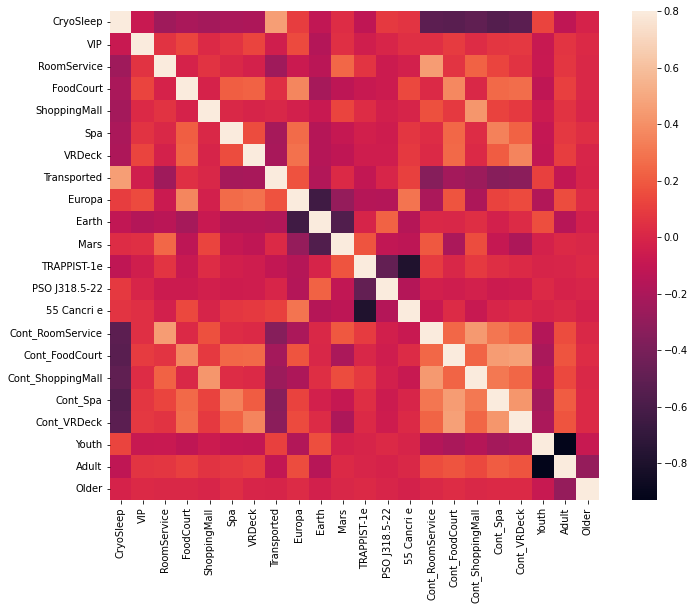

In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

> <font face = 'Century'> _**Note:** The lightest pixels are those that have the highest correlation and the darkest do not give any information because there is no correlation between them._

<font face = 'Century'> As _`Transported`_ is the predictive variable it's row and column must be analyzed because we can see the correlated variables. From this, as seen in the matrix, the _`CryoSleep`_ is the one with the higest correlaiton so it can give us important information.

- <font face = 'Century'> **Histogram**

 <font face = 'Century'> Let's understand a little bit the data and how the information is distributed:

> <font face = 'Century'> _Destination:_

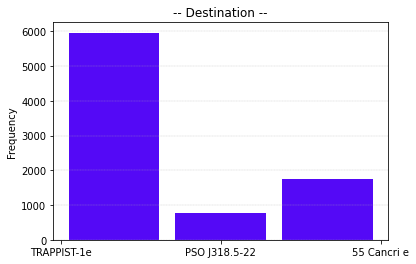

In [ ]:
plt.hist(x=df_train['Destination'], bins=len(df_train.Destination.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- Destination --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.Destination.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')
#5409F6
#9109F6

> <font face = 'Century'> _Home Planet:_

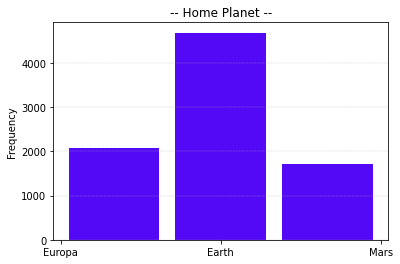

In [ ]:
plt.hist(x=df_train['HomePlanet'], bins=len(df_train.HomePlanet.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- Home Planet --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.HomePlanet.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

> <font face = 'Century'> _VIP_

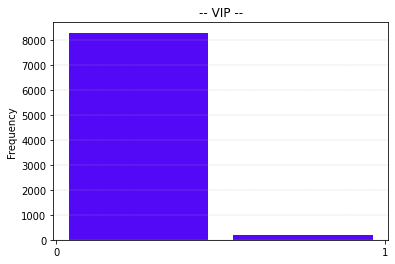

In [ ]:
plt.hist(x=df_train['VIP'], bins=len(df_train.VIP.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- VIP --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.VIP.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

> <font face = 'Century'> _CryoSleep:_

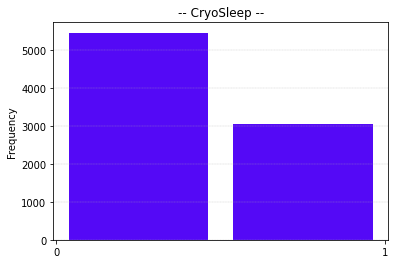

In [ ]:
plt.hist(x=df_train['CryoSleep'], bins=len(df_train.CryoSleep.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- CryoSleep --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.CryoSleep.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

> <font face = 'Century'> _Transported:_

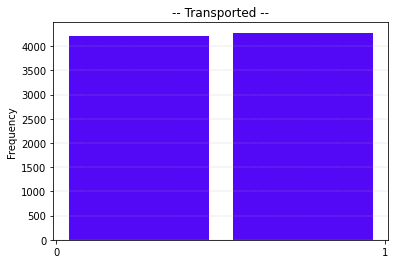

In [ ]:
plt.hist(x=df_train['Transported'], bins=len(df_train.Transported.unique()), color='#5409F6', rwidth=0.85,)
plt.title('-- Transported --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,len(df_train.Transported.unique()))))
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

In [ ]:
print('N° Transported Passengers = ',sum(df_train.Transported == 1))
print('N° Non-Transported Passengers = ',sum(df_train.Transported == 0))

N° Transported Passengers =  4277
N° Non-Transported Passengers =  4216


> <font face = 'Century'> _Age:_

<font face = 'Century'> Organizing the data in a list to be able to graph them and see the comparison:

In [ ]:
age_list = []

for i in range(len(df_train)):
    if df_train.Youth[i] == 1:
        age_list.append('Youth')
        
    if df_train.Adult[i] == 1:
        age_list.append('Adult')
    
    if df_train.Older[i] == 1:
        age_list.append('Older')  
     
age_df = pd.DataFrame() 
age_df['Age'] = age_list
age_df.head()

,Age
0,Adult
1,Adult
2,Adult
3,Adult
4,Youth


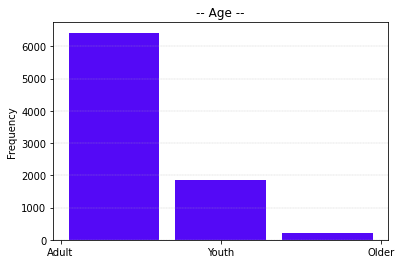

In [ ]:
plt.hist(x=age_df['Age'], bins=3, color='#5409F6', rwidth=0.85,)
plt.title('-- Age --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,3)))
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

> <font face = 'Century'> _Contracted Service:_

<font face = 'Century'> Organizing the data in a list to be able to graph them and see the comparison:

In [ ]:
services_list = []

for i in range(len(df_train)):
    if df_train.Cont_RoomService[i] == 1:
        services_list.append('RoomService')
        
    if df_train.Cont_FoodCourt[i] == 1:
        services_list.append('FoodCourt')
    
    if df_train.Cont_ShoppingMall[i] == 1:
        services_list.append('ShoppingMall') 
        
    if df_train.Cont_Spa[i] == 1:
        services_list.append('Spa') 
        
    if df_train.Cont_VRDeck[i] == 1:
        services_list.append('VRDeck') 
     
services_df = pd.DataFrame() 
services_df['Services'] = services_list
services_df.head()

,Services
0,RoomService
1,FoodCourt
2,ShoppingMall
3,Spa
4,VRDeck


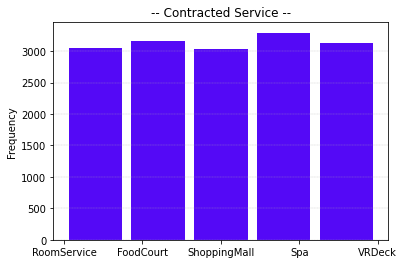

In [ ]:
plt.hist(x=services_df['Services'], bins=5, color='#5409F6', rwidth=0.85,)
plt.title('-- Contracted Service --')
plt.ylabel('Frequency')
plt.xticks(list(range(0,5)))
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

> <font face = 'Century'> _**Note:** Remember that one passenger could take as many services as he/she wanted._

 <font face = 'Century'> Taking into account all these graphs and information above, let's analyze the correlation between `CryoSleep` and `Transported` variables:

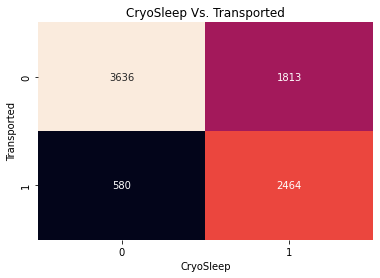

In [ ]:
conf_matr = confusion_matrix(df_train.CryoSleep, df_train.Transported)
sns.heatmap(conf_matr ,annot=True,cbar=False, fmt="d")
plt.ylabel('Transported')
plt.xlabel('CryoSleep')
plt.title('CryoSleep Vs. Transported')
plt.show()

In [ ]:
print('N° of passengers that WERE NOT in CryoSleep and WERE NOT transported =', sum((df_train.Transported==0)&(df_train.CryoSleep==0)))
print('N° of passengers that WERE in CryoSleep and WERE NOT transported =', sum((df_train.Transported==0)&(df_train.CryoSleep==1)))
print('N° of passengers that WERE in CryoSleep and WERE transported =', sum((df_train.Transported==1)&(df_train.CryoSleep==1)))
print('N° of passengers that WERE NOT in CryoSleep and WERE transported =', sum((df_train.Transported==1)&(df_train.CryoSleep==0)))

N° of passengers that WERE NOT in CryoSleep and WERE NOT transported = 3636
N° of passengers that WERE in CryoSleep and WERE NOT transported = 580
N° of passengers that WERE in CryoSleep and WERE transported = 2464
N° of passengers that WERE NOT in CryoSleep and WERE transported = 1813


 <font face = 'Century'> As can be seen, those passengers that were in CryoSleep were more likely to be transported to another dimension than those who weren't.

<p><a name="Model Evaluation"></a></p>

## <font color ="royalblue"> <font face = 'Century' >  Model Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error

<font face = 'Century' > To start working we are going to crate a copy of `df_train` and save it into a new variable `df` to avoid modifying the original data and we are going to replace the index for `PassengerId` column.

In [ ]:
df = df_train.copy()

In [ ]:
df.index = df['PassengerId']
del[df['PassengerId']]

In [ ]:
df

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
0002_01,Earth,0,F/0/S,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,...,0,0,1,1,1,1,1,0,1,0
0003_01,Europa,0,A/0/S,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,...,0,0,1,1,0,1,1,0,1,0
0003_02,Europa,0,A/0/S,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,1,1,1,1,0,1,0
0004_01,Earth,0,F/1/S,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,0,A/98/P,55 Cancri e,1,0.0,6819.0,0.0,1643.0,74.0,...,0,1,0,1,0,1,1,0,1,0
9278_01,Earth,1,G/1499/S,PSO J318.5-22,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
9279_01,Earth,0,G/1500/S,TRAPPIST-1e,0,0.0,0.0,1872.0,1.0,0.0,...,0,0,0,0,1,1,0,0,1,0


<font face = 'Century' >  As we are going to make predictions we need to delete all categorical columns that don't contribute to the prediction process. 

In [ ]:
for col in df:
    if df[col].dtype == 'O':
        df = df.drop([col], axis=1)
df

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Earth,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
0002_01,0,0,109.0,9.0,25.0,549.0,44.0,1,0,1,...,0,0,1,1,1,1,1,0,1,0
0003_01,0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,...,0,0,1,1,0,1,1,0,1,0
0003_02,0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,...,0,0,0,1,1,1,1,0,1,0
0004_01,0,0,303.0,70.0,151.0,565.0,2.0,1,0,1,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
9278_01,1,0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9279_01,0,0,0.0,0.0,1872.0,1.0,0.0,1,0,1,...,0,0,0,0,1,1,0,0,1,0


<font face = 'Century' > Next, we divided the train dataframe into two groups, one for training that corresponds to the 70% of the total  and one for testing that corresponds to the missing 30%.

In [ ]:
Xtr = df[[col for col in df.columns if col!= 'Transported']].values[:5945]
ytr = df['Transported'].values[:5945]

In [ ]:
Xts = df[[col for col in df.columns if col!= 'Transported']].values[:2548]
yts = df['Transported'].values[:2548]

<font face = 'Century' > Finally, we have our dataset ready for training the model that we are going to define in the following steps.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

<font face = 'Century'> **Running different types of estimators:**

In [ ]:
estimator_type = [RandomForestClassifier(n_estimators=5, max_depth=30), DecisionTreeClassifier(max_depth=2), 
                  Pipeline((("pca", PCA(n_components=2)), ("estimator", SVC(gamma = 1)))), SVC(gamma = 1)]
train_acc = []
test_acc = []

for i in estimator_type:
    estimator = i
    estimator.fit(Xtr,ytr)
    train_acc.append(round(estimator.score(Xtr,ytr), 2))
    test_acc.append(round(estimator.score(Xts,yts), 2))
    
    
    
    print(estimator)
    print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
    print ("test accuracy  %.2f"%estimator.score(Xts,yts),'\n')

RandomForestClassifier(max_depth=30, n_estimators=5)
train accuracy 0.89
test accuracy  0.88 

DecisionTreeClassifier(max_depth=2)
train accuracy 0.71
test accuracy  0.72 

Pipeline(steps=[('pca', PCA(n_components=2)), ('estimator', SVC(gamma=1))])
train accuracy 0.89
test accuracy  0.87 

SVC(gamma=1)
train accuracy 0.91
test accuracy  0.90 



<font face = 'Century'>  Let's visualize this results in a bar graph:

In [ ]:
print(train_acc)
print(test_acc)

[0.89, 0.71, 0.89, 0.91]
[0.88, 0.72, 0.87, 0.9]


In [ ]:
estimator_list = ['RFC', 'DTC', 'PL', 'SVC']

df_estimator = pd.DataFrame()
df_estimator['Train'] = train_acc
df_estimator['Test'] = test_acc
df_estimator.index = estimator_list
df_estimator = df_estimator.rename_axis('Estimator')
df_estimator

,Train,Test
Estimator,,
RFC,0.89,0.88
DTC,0.71,0.72
PL,0.89,0.87
SVC,0.91,0.90


In [ ]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1.1,y_list[i-1],y_list[i-1], ha="right")
        
def add_value_label2(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-0.65,y_list[i-1],y_list[i-1], ha="right")

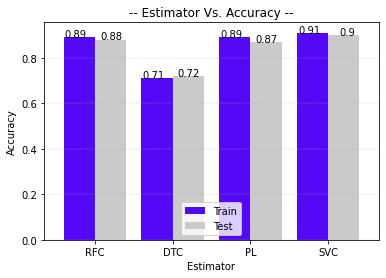

In [ ]:
colors = ['#5409F6', '#CBCACA']
df_estimator.plot(kind = 'bar', width=0.8, color = colors, title = '-- Estimator Vs. Accuracy --')
plt.xticks(rotation= 0)
plt.legend(loc = 'lower center')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

add_value_label(estimator_list, df_estimator.Train)
add_value_label2(estimator_list, df_estimator.Test)


<font face = 'Century'> As we can see, the best perfomance gotten with an estimator is SVC. Let's see how the predictions were by means of a confusion matrix graph:

In [ ]:
estimator = SVC(gamma=1)
estimator.fit(Xtr,ytr)

SVC(gamma=1)

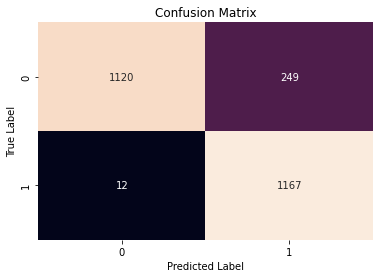

In [ ]:
cm = confusion_matrix(yts, estimator.predict(Xts))
sns.heatmap(cm,annot=True,cbar=False, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

<font face = 'Century'> **Running the best three estimators with different hyperparameters:**

> <font face = 'Century'>  **a. Random Forest Classifier:**

In [ ]:
a = np.linspace(5, 25, 5).astype(int)
b = np.linspace(10, 30, 5).astype(int)
permutation = [(x,y) for x in a for y in b]

train_RF_acc = []
test_RF_acc = []

for i in permutation:
    estimator_RF = RandomForestClassifier(n_estimators=i[0], max_depth=i[1]).fit(Xtr,ytr) 
    train_RF_acc.append(round(estimator_RF.score(Xtr,ytr), 2))
    test_RF_acc.append(round(estimator_RF.score(Xts,yts), 2))
    
    #print(estimator_1)
    #print ("train accuracy %.2f"%estimator_1.score(Xtr,ytr))
    #print ("test accuracy  %.2f"%estimator_1.score(Xts,yts),'\n')

<font face = 'Century'> Let's visualize in a bar graph how the accuracy change with the different hyperparameters used:

In [ ]:
print(train_RF_acc)
print(test_RF_acc)

[0.83, 0.88, 0.89, 0.89, 0.89, 0.83, 0.88, 0.9, 0.9, 0.9, 0.84, 0.89, 0.91, 0.91, 0.91, 0.83, 0.89, 0.91, 0.91, 0.91, 0.83, 0.89, 0.91, 0.91, 0.91]
[0.82, 0.86, 0.87, 0.88, 0.88, 0.82, 0.87, 0.89, 0.89, 0.89, 0.83, 0.88, 0.89, 0.89, 0.89, 0.82, 0.88, 0.89, 0.89, 0.89, 0.82, 0.88, 0.89, 0.89, 0.9]


In [ ]:
df_estimator_RF = pd.DataFrame()
df_estimator_RF['Train'] = train_RF_acc
df_estimator_RF['Test'] = test_RF_acc
df_estimator_RF.index = permutation
df_estimator_RF = df_estimator_RF.rename_axis('n_estimators, max_depth')
df_estimator_RF.head()

,Train,Test
"n_estimators, max_depth",,
"(5, 10)",0.83,0.82
"(5, 15)",0.88,0.86
"(5, 20)",0.89,0.87
"(5, 25)",0.89,0.88
"(5, 30)",0.89,0.88


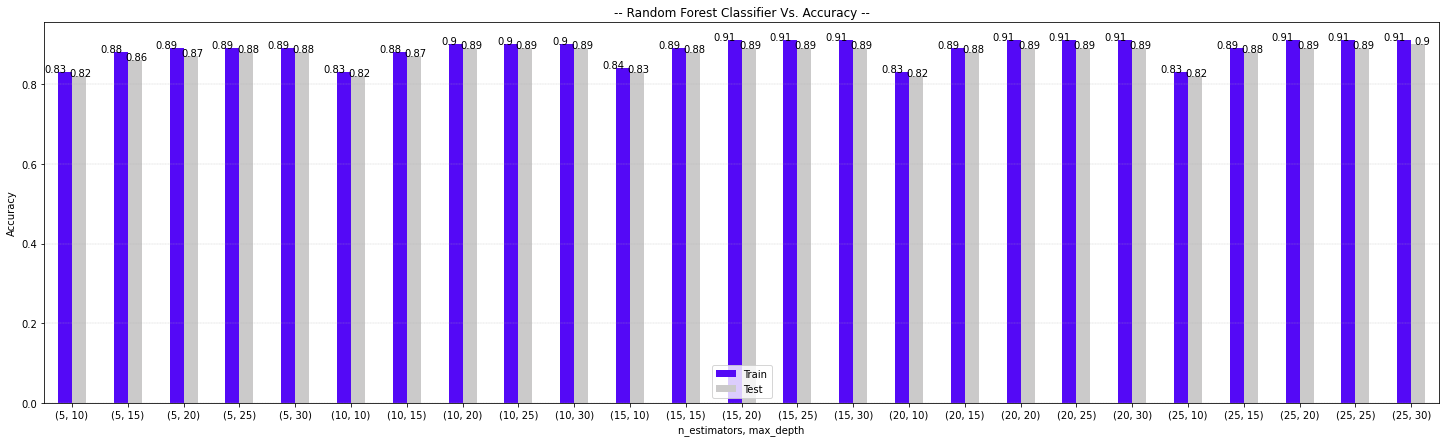

In [ ]:
colors = ['#5409F6', '#CBCACA']

df_estimator_RF.plot(kind = 'bar', figsize=(25,7) ,color = colors, title = '-- Random Forest Classifier Vs. Accuracy --')
plt.xticks(rotation= 0)
plt.legend(loc = 'lower center')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')

add_value_label(permutation, df_estimator_RF.Train)
add_value_label2(permutation, df_estimator_RF.Test)


<font face = 'Century'> _**Note:** `(a,b)` labels in the `X` axis are `n_estimators` and `max_depth` respectively._

<font face = 'Century'> As can be seen, the best perfomance or maximum accuracy obtained was _**Train = 91 %**_ and _**Test = 90 %**_.

> <font face = 'Century'>  **b. Pipeline:**

In [ ]:
estimator_1 = Pipeline((("pca", PCA(n_components=2)), ("estimator", SVC(gamma = 1))))
estimator_2 = Pipeline((("pca", PCA(n_components=6)), ("estimator", SVC(gamma = 1))))
estimator_3 = Pipeline((("pca", PCA(n_components=12)), ("estimator", SVC(gamma = 1))))
estimator_4 = Pipeline((("pca", PCA(n_components=2)), ("estimator", SVC(gamma = 2))))
estimator_5 = Pipeline((("pca", PCA(n_components=2)), ("estimator", SVC(gamma = 6))))
estimator_6 = Pipeline((("pca", PCA(n_components=2)), ("estimator", SVC(gamma = 12))))

estimators = [estimator_1, estimator_2, estimator_3, estimator_4, estimator_5, estimator_6]
train_acc = []
test_acc = []

for i in estimators:
    estimator = i
    estimator.fit(Xtr,ytr)
    train_acc.append(round(estimator.score(Xtr,ytr), 2))
    test_acc.append(round(estimator.score(Xts,yts), 2))

    #print(estimator)
    #print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
    #print ("test accuracy  %.2f"%estimator.score(Xts,yts),'\n')

<font face = 'Century'> Let's visualize in a bar graph how the accuracy change with the different hyperparameters used:

In [ ]:
print(train_acc, type(train_acc))
print(test_acc)

[0.89, 0.91, 0.91, 0.9, 0.9, 0.9] <class 'list'>
[0.87, 0.89, 0.9, 0.88, 0.88, 0.88]


In [ ]:
df_estimator_PL = pd.DataFrame()
df_estimator_PL.index = [(2, 1), (6, 1), (12, 1), (2, 2), (2, 6), (2, 12)]
df_estimator_PL['Train'] = train_acc
df_estimator_PL['Test'] = test_acc
df_estimator_PL.head()

,Train,Test
"(2, 1)",0.89,0.87
"(6, 1)",0.91,0.89
"(12, 1)",0.91,0.90
"(2, 2)",0.90,0.88
"(2, 6)",0.90,0.88


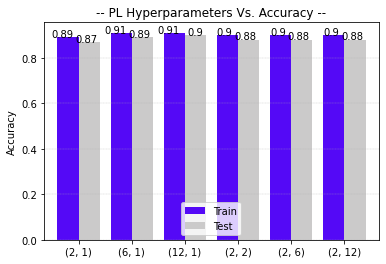

In [ ]:
colors = ['#5409F6', '#CBCACA']

df_estimator_PL.plot(kind = 'bar', width=0.8, color = colors, title = '-- PL Hyperparameters Vs. Accuracy --')
plt.xticks(rotation= 0)
plt.legend(loc = 'lower center')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth='0.3', axis='y')
add_value_label(df_estimator_PL.index, df_estimator_PL.Train)
add_value_label2(df_estimator_PL.index, df_estimator_PL.Test)


<font face = 'Century'> _**Note:** `(a,b)` labels in the `X` axis are `n_components` and `gamma` respectively._

<font face = 'Century'> As can be seen, the best perfomance or maximum accuracy obtained was _**Train = 91 %**_ and _**Test = 90 %**_ with `n_components = 12` and `gamma = 1`.

> <font face = 'Century'>  **c. Support Vector Machine SVC:**

In [ ]:
estimator_1 = SVC(gamma = 0.5)
estimator_2 = SVC(gamma = 1)
estimator_3 = SVC(gamma = 5)

estimators = [estimator_1, estimator_2, estimator_3]
train_SVC_acc = []
test_SVC_acc = []

for i in estimators:
    estimator = i
    estimator.fit(Xtr,ytr)
    train_SVC_acc.append(round(estimator.score(Xtr,ytr), 2))
    test_SVC_acc.append(round(estimator.score(Xts,yts), 2))

    #print(estimator)
    #print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
    #print ("test accuracy  %.2f"%estimator.score(Xts,yts),'\n')

<font face = 'Century'> Let's check how the accuracy changed with the different hyperparameters used:

In [ ]:
df_estimator_SVC = pd.DataFrame()
df_estimator_SVC['Train'] = train_SVC_acc
df_estimator_SVC['Test'] = test_SVC_acc
df_estimator_SVC.index = [0.5, 1, 5]
df_estimator_SVC = df_estimator_SVC.rename_axis('Gamma')
df_estimator_SVC.head()

,Train,Test
Gamma,,
0.5,0.91,0.9
1.0,0.91,0.9
5.0,0.91,0.9


<font face = 'Century'> As can be seen, the accuracy didn't change with any of the hyperparameters and the maximum value obtained was _**Train = 91 %**_ and _**Test = 90 %**.

<font face = 'Century'> In conclusion, the best hyperparameters for _Pipeline_ are `n_components = 12` and `gamma = 1` and for _Support Vector Machine_ is `gamma = 1`.

<p><a name="Unsupervised Model"></a></p>

- ### <font color ="royalblue"> <font face = 'Century' >  Unsupervised Model

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML, Image

<font face = 'Century'>  Taking into account the _correlation matrix_ above, the variables most related to the variable `Transpoted` are `Cryosleep`, `Europa` and `Youth`. Then, we create a dataframe with two of those variables (`Cryosleep` and `Europa`) to determine the clusters:

In [ ]:
df_UM = pd.DataFrame()
df_UM['CryoSleep'] = df.CryoSleep
df_UM['Europa'] = df.Europa
df_UM

,CryoSleep,Europa
PassengerId,,
0001_01,0,1
0002_01,0,0
0003_01,0,1
0003_02,0,1
0004_01,0,0
...,...,...
9276_01,0,1
9278_01,1,0
9279_01,0,0


<font face = 'Century'> Let's define the data and predicted variables and graph them:

In [ ]:
X = df_UM.values
y = df['Transported'].values

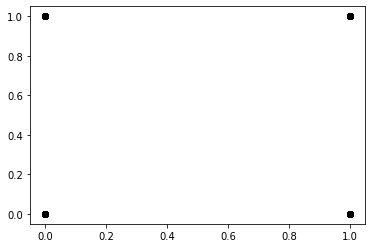

In [ ]:
plt.scatter(X[:,0], X[:,1], color="black", alpha=.5)

<font face = 'Century'>  Let's make a silhouette analysis for the data we are working with:

In [ ]:
def silhouette_analysis(X):
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for %s clustering on sample data "
                      "with n_clusters = %d, score = %.3f" % (clusterer.__class__.__name__, n_clusters,silhouette_avg)),
                     fontsize=14, fontweight='bold')

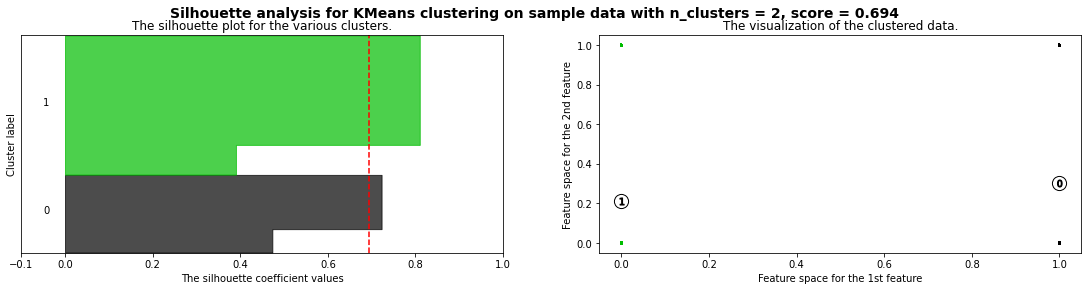

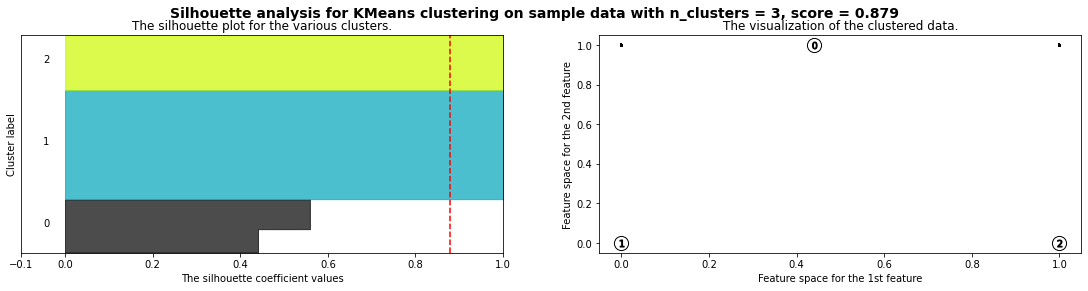

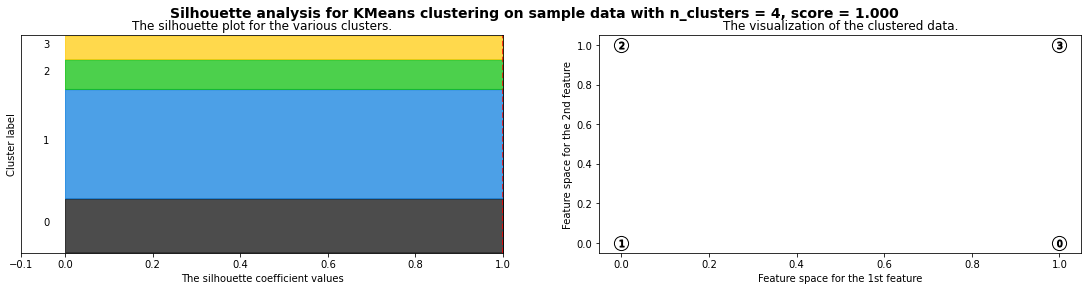

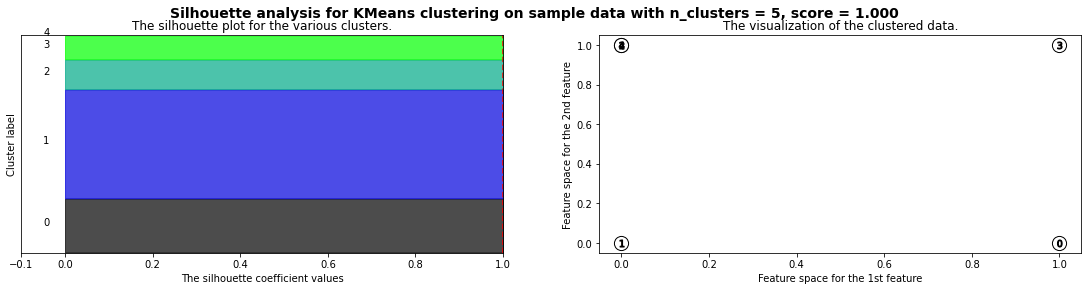

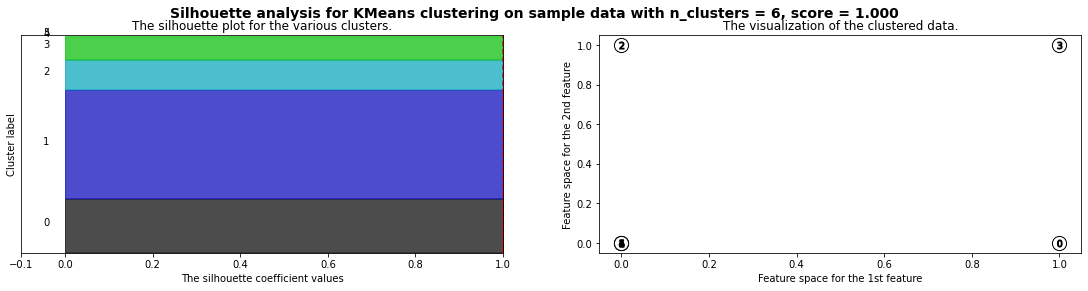

In [ ]:
silhouette_analysis(X)

<font face = 'Century'>  As can be seen, the dataframe gotten has no continuous variables related to the `Transported` variable, so it is not possible to use unsupervised learning based on clustering algorithm used. The continuous data in the dataframe are those related to the services taken by the passenger, but as can be seen in the _correlation matrix_ there's no close relation between these and the `Transported` one and accordingly, this won't give us useful information.

<p><a name="Learning Curves"></a></p>

- ### <font color ="royalblue"> <font face = 'Century' >  Learning Curves

<font face = 'Century'> Let's see the corresponding learning curves for each one of the **best estimators** obtained previously with their best hyperparameters using _sklearn_ library with the bootstrapping method.

<font face = 'Century'> For this, the course library taken from the _notebook 05.02_ will be used.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
from local.lib import calhousing as ch
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

In [ ]:
X = df.values[:,:-1]
y = df['Transported'].values

>  <font face = 'Century' >  **a.** _Support Vector Machine:_  

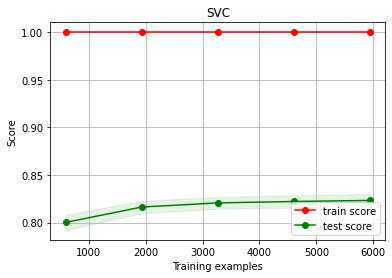

In [ ]:
estimator_SVC = SVC(gamma=1)
cv = ShuffleSplit(n_splits=10, test_size=0.3)
ch.plot_learning_curve(estimator_SVC, estimator.__class__.__name__, X, y, cv=cv, scoring=make_scorer(accuracy_score))

 <font face = 'Century' > As can be seen here, when adding more data the graph does not converge. We have a good performance in train, but in test there is a bad performance and there is a huge difference between them. In other words, the method learned the data by heart and this is called **_Overfitting_**. This might be for several reasons, such as:
- It takes a lot more data.
- Requires another type of algorithm.
- Or the complexity of the algorithm used must be lower.


 <font face = 'Century' >Let's try to lower the complexity of the Support Vector Machine estimator by decreasing the `gamma` value to `gamma=0.2` and `gamma=0.01`:

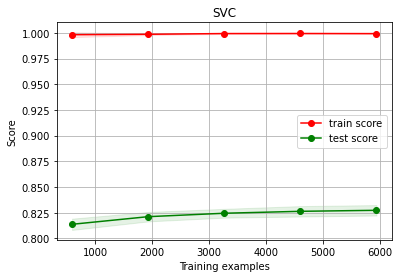

In [ ]:
estimator_SVC = SVC(gamma=0.2)
cv = ShuffleSplit(n_splits=10, test_size=0.3)
ch.plot_learning_curve(estimator_SVC, estimator.__class__.__name__, X, y, cv=cv, scoring=make_scorer(accuracy_score))

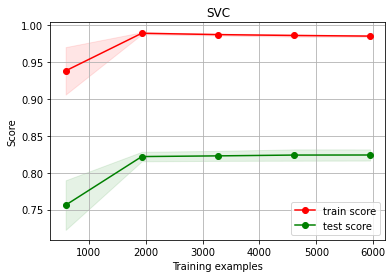

In [ ]:
estimator_SVC = SVC(gamma=0.01)
cv = ShuffleSplit(n_splits=10, test_size=0.3)
ch.plot_learning_curve(estimator_SVC, estimator.__class__.__name__, X, y, cv=cv, scoring=make_scorer(accuracy_score))

 <font face = 'Century' > As is shown, the performance and the behavior of the graphs doesn't change much and this is a good sign that more data is needed.

>  <font face = 'Century' > **b.** _Random Forest Classifier:_  

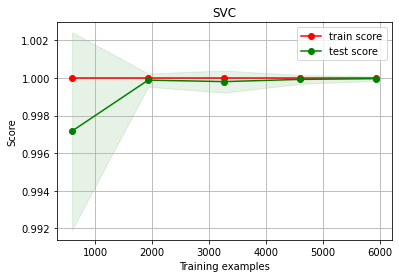

In [ ]:
estimator_RFC = RandomForestClassifier(n_estimators=12)
cv = ShuffleSplit(n_splits=10, test_size=0.3)
ch.plot_learning_curve(estimator_RFC, estimator.__class__.__name__, X, y, cv=cv, scoring=make_scorer(accuracy_score))

 <font face = 'Century' > As can be seen, the performance of test increases according to the amount of data. However, the train performance shows that data was learned by heart.

 <font face = 'Century' > Let's see what happen if we change the `n_estimators` and `max_depth`.

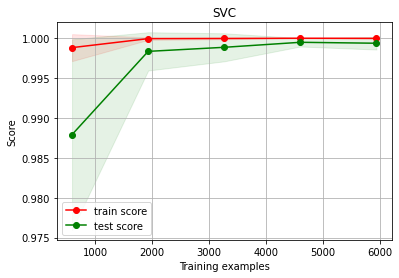

In [ ]:
estimator_RFC2 = RandomForestClassifier(n_estimators=5, max_depth=20)
cv = ShuffleSplit(n_splits=10, test_size=0.3)
ch.plot_learning_curve(estimator_RFC2, estimator.__class__.__name__, X, y, cv=cv, scoring=make_scorer(accuracy_score))

 <font face = 'Century' > In conclusion, the best performance obtained is when using the Random Forest estimator.